In [1]:
import sys
sys.path.append('../wamuu')
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from instance import Instance
from utils import sweep_groups, sort_group_by_subst_dist, prim, get_turb_out_power, put_cables, cost

In [2]:
I = Instance(
    instance_dir='../data/raw',
    instance='n50_s01_t01_w01'
)

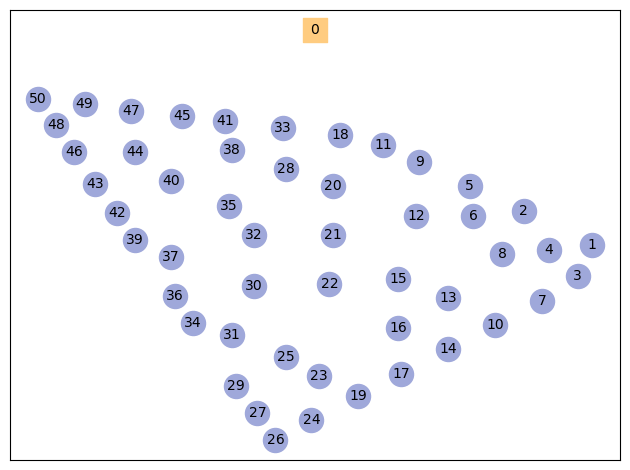

In [3]:
G = nx.DiGraph()
for i in range(I.n+1):
    G.add_node(i, pos=I.nodes[i])
pos = nx.get_node_attributes(G, 'pos')
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0],
                       node_color='#FFCC80',
                       node_shape='s')
nx.draw_networkx_nodes(G, pos,
                       nodelist=range(1, I.n+1),
                       node_color='#9FA8DA')
nx.draw_networkx_labels(G, pos,
                        font_size=10)
plt.tight_layout()
plt.show()

In [4]:
groups = sweep_groups(I.n,
                      starting_index=9,
                      clockwise=True,
                      tpg = I.n//I.C + 1)
groups = [sort_group_by_subst_dist(group, I.dist) for group in groups]
edges_group = [prim(group, I.dist, group[0]) for group in groups]
powers = [get_turb_out_power(groups[i], edges_group[i]) for i in range(len(groups))]
power = dict()
for p in powers:
    power |= p
node_cableindex = put_cables(power, I.cables)
edges = []
for eg in edges_group:
    edges.extend(eg)
for group in groups:
    edges.append([group[0], 0])

/tmp/ipykernel_8691/809574376.py:21: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos,


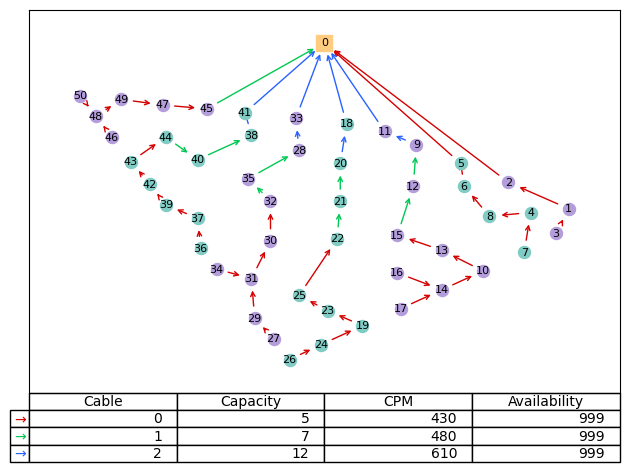

In [5]:
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0],
                       node_color='#FFCC80',
                       node_size=120,
                       node_shape='s')
color = ['#B39DDB', '#80CBC4']
for i in range(len(groups)):
    nx.draw_networkx_nodes(G, pos,
                           nodelist=groups[i],
                           node_color=color[i%2],
                           node_shape='.')
# edgelist = []
# for edges in edges_group:
#     edgelist.extend(edges)
# for group in groups:
#     edgelist.append([group[0], 0])
edgecolors = ['#D50000', '#00C853', '#2962FF', '#FFD600', '#C51162']
edge_color = [None for _ in edges]
for i in range(len(edges)):
    edge_color[i] = edgecolors[node_cableindex[edges[i][0]]]
nx.draw_networkx_edges(G, pos,
                       edgelist=edges,
                       edge_color=edge_color,
                       arrowstyle='->',
                       arrowsize=8)
nx.draw_networkx_labels(G, pos, font_size=8)
table = plt.table(
    colLabels=['Cable', 'Capacity', 'CPM', 'Availability'],
    rowLabels=[r'$\to$' for _ in I.cables],
    cellText=[
        [i, I.cables[i]['capacity'], I.cables[i]['cpm'], I.cables[i]['availability']] for i in range(len(I.cables))
    ]
)
for i in range(len(I.cables)):
    table[(i+1, -1)].get_text().set_color(edgecolors[i])
plt.tight_layout()
plt.show()

In [6]:
c = cost(I.nodes, edges, I.dist, I.cables, node_cableindex, I.C, debug=True)
print(f'Final cost: {c}')

Cable costs: 40154994.19784065
Connections to the substation: 1000000000.0
Crossings: 0.0
Proper Tree: 0.0
Final cost: 1040154994.1978407
